In [1]:
# [1] 패키지를 불러오기

from keras import layers  # 각 계층을 만드는 모듈
from keras import models  # 각 계층을 연결하여 신경망 모델을 만든 후, 컴파일하고 학습시키는 모듈
                          # complie(), fit(), predict(), evaluate() 등 딥러닝 처리 함수 대부분을 제공함

In [2]:
# [2] 필요한 파라미터 설정
# 후반의 main()에서 설정
# Nin 입력 계층 노드 수, Nh 은닉 계층 수, number_of_class 출력값이 가질 클래스 수, Nout 출력 노드 수

In [4]:
# [3] 모델 구현
# 신경망을 연쇄 방식의 모델링을 포함하는 함수형 구현

def ANN_seq_func(Nin, Nh, Nout):
  model = models.Sequential()
  model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
  model.add(layers.Dense(Nout, activation='softmax'))
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [8]:
# [4] 데이터 불러오기
# Mnist 필기 숫자 데이터셋

import numpy as np
from keras import datasets # mnist
from keras.utils import np_utils  # to_categorical

def Data_func():
  (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

  # 0~9의 숫자로 된 출력값을 이진수(0/1)로 표현되는 벡터로 바꿈 (더 효율적)
  Y_train = np_utils.to_categorical(y_train)
  Y_test = np_utils.to_categorical(y_test)

  L, W, H = X_train.shape
  X_train = X_train.reshape(-1, W*H)  # -1 행렬의 행을 자동으로 설정, 열수가 W*H로 지정
  X_test = X_test.reshape(-1, W*H)

  X_train = X_train/255.0             # 정규화: 0~255로 되어 있는 입력값을 0~1로 바꿔줌(성능 최적화를 위함)
  X_test = X_test/255.0

  return (X_train, Y_train), (X_test, Y_test)

In [9]:
# [5] 학습 결과 분석을 위한 그래프 구현(pytoch, keras 모두 쓸 수 있음)

import matplotlib.pyplot as plt

def plot_acc(history, title=None):
  # summarize history for accuracy
  if not isinstance(history, dict):
    history = history.history
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  if title is not None:
    plt.title(title)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Verification'], loc=0)   # 두 선의 이름(Train, Test) 표시

def plot_loss(history, title=None):
  # summarize history for loss
  if not isinstance(history, dict):
    history = history.history
  plt.plot(history['loss'])             # 학습 데이터로 구한 손실값
  plt.plot(history['val_loss'])         # 검증 데이터로 구한 손실값
  if title is not None:
    plt.title(title)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Verification'], loc=0)


Epoch 1/15
480/480 [==============================] - 2s 4ms/step - loss: 0.6780 - accuracy: 0.8160 - val_loss: 0.2079 - val_accuracy: 0.9409
Epoch 2/15
480/480 [==============================] - 2s 3ms/step - loss: 0.1902 - accuracy: 0.9457 - val_loss: 0.1511 - val_accuracy: 0.9590
Epoch 3/15
480/480 [==============================] - 2s 3ms/step - loss: 0.1355 - accuracy: 0.9622 - val_loss: 0.1272 - val_accuracy: 0.9642
Epoch 4/15
480/480 [==============================] - 2s 3ms/step - loss: 0.1056 - accuracy: 0.9702 - val_loss: 0.1118 - val_accuracy: 0.9685
Epoch 5/15
480/480 [==============================] - 2s 3ms/step - loss: 0.0850 - accuracy: 0.9764 - val_loss: 0.1079 - val_accuracy: 0.9690
Epoch 6/15
480/480 [==============================] - 2s 3ms/step - loss: 0.0693 - accuracy: 0.9806 - val_loss: 0.0986 - val_accuracy: 0.9718
Epoch 7/15
480/480 [==============================] - 2s 3ms/step - loss: 0.0559 - accuracy: 0.9846 - val_loss: 0.0938 - val_accuracy: 0.9729
Epoch 

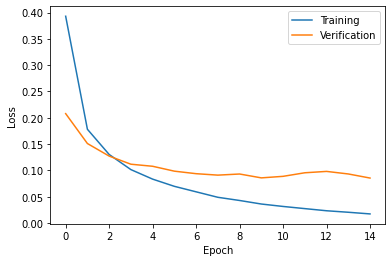

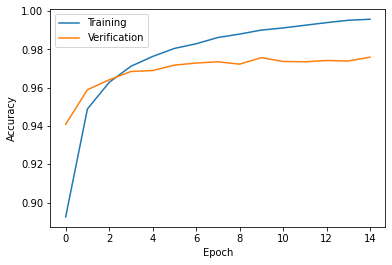

In [13]:
# [6] 학습 및 성능 분석

def main():
  # 파라미터 설정
  # Nin 입력 계층 노드 수, Nh 은닉 계층 수, number_of_class 출력값이 가질 클래스 수, Nout 출력 노드 수
  Nin = 784
  Nh = 100    # 100
  number_of_class = 10
  Nout = number_of_class

  # 모델 설정
  model = ANN_seq_func(Nin, Nh, Nout)
  (X_train, Y_train), (X_test, Y_test) = Data_func()

  # 학습하기
  history = model.fit(X_train, Y_train, epochs=15, batch_size=100, validation_split=0.2)
  performance_test = model.evaluate(X_test, Y_test, batch_size=100)
  print('Test Loss and Accuracy -->', performance_test)

  plot_loss(history)
  plt.show()
  plot_acc(history)
  plt.show()

# main() 코드 실행하기
if __name__ == '__main__':
  main()